In [1]:
%load_ext autoreload

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from matplotlib import rcParams
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.colors as mcolors
plt.rc('font',family='serif')
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
plt.rc('axes',labelsize=20)
plt.rc('axes',titlesize=20)
plt.rc('legend',fontsize=16)
plt.rc('lines', linewidth=2)
plt.rc('savefig', dpi=300)

plt.rcParams['figure.autolayout'] =  True
plt.rcParams["font.family"] = "Serif"
cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
mpl.rcParams['font.serif']=cmfont.get_name()
mpl.rcParams['mathtext.fontset']='cm'
mpl.rcParams['axes.unicode_minus']=False
plt.rcParams['figure.figsize'] = [10, 8]
colors = list(mcolors.TABLEAU_COLORS.values())

In [3]:
%autoreload

import sys
sys.path.append('/burg/home/su2254/in_prep/moire/src/localized_orbitals/refactor')

import numpy

# Custom modules.
import planewaves
import kpoints
import wannier
import utils
import testing
import plotting
from constants import *

path = '/burg/home/su2254/in_prep/moire/src/localized_orbitals/refactor/tests/data_for_testing/rescaled_cm_kpt/'
filetag = 'ghf_rescaled_Lm=250.904_V0=0.011_eps=10_ecut=0.0043_nbsf=127_nkpt=100_tri_2d'

_bloch_energy, _bloch_coeff, params = testing.build_test_rcm_kpts(path, filetag)

# Note that `_bloch_energy` and `_bloch_coeff` contain the entire spectrum for each k-point.
# So let us duplicated only the lowest band spectra.
bloch_energy = numpy.copy(_bloch_energy[:, 0])
bloch_coeff = numpy.copy(_bloch_coeff[:, :, 0]).T

basis_obj_u = testing.build_test_basis_obj(path, filetag, unit_cell=True, rescale=True)
kpts_obj = testing.build_test_kpts_obj(path, filetag, rescale=True)
verbose = True

{'Lm': 474.1398567218333,
 'V0': 0.00040424254174194544,
 'alpha': 285.7142905799711,
 'beta': 0.03499999940395,
 'ecut': 0.00430000014603,
 'eps': 10.0,
 'meff': 0.34999999403954,
 'nsite': 100,
 'phi': -0.028634037459950613}


In [28]:
fname = filetag + '.12345.png'
split = fname.split('.')
print(split)
'.'.join(split[:-2]) + '.lc.' + '.'.join(split[-2:])

['ghf_rescaled_Lm=250', '904_V0=0', '011_eps=10_ecut=0', '0043_nbsf=127_nkpt=100_tri_2d', '12345', 'png']


'ghf_rescaled_Lm=250.904_V0=0.011_eps=10_ecut=0.0043_nbsf=127_nkpt=100_tri_2d.lc.12345.png'

# Plot $\vec{k}$-points

In [6]:
recip_vecs_u2 = numpy.sum(basis_obj_u.recip_vecs, axis=1)

# Find perpendicular bisector
m1, n1 = kpoints.get_perpendicular_bisector(basis_obj_u.recip_vecs[:, 0])
m2, n2 = kpoints.get_perpendicular_bisector(basis_obj_u.recip_vecs[:, 1])
m3, n3 = kpoints.get_perpendicular_bisector(-basis_obj_u.recip_vecs[:, 0])
m4, n4 = kpoints.get_perpendicular_bisector(-basis_obj_u.recip_vecs[:, 1])
m5, n5 = kpoints.get_perpendicular_bisector(recip_vecs_u2)
m6, n6 = kpoints.get_perpendicular_bisector(-recip_vecs_u2)

# Define points on the bisector line
lim = 1
t = numpy.linspace(-lim, lim, 100)
bz_edge1 = numpy.outer(t, n1) + m1
bz_edge2 = numpy.outer(t, n2) + m2
bz_edge3 = numpy.outer(t, n3) + m3
bz_edge4 = numpy.outer(t, n4) + m4
bz_edge5 = numpy.outer(t, n5) + m5
bz_edge6 = numpy.outer(t, n6) + m6

/local/ipykernel_263953/2854496409.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(1, 1, figsize=(6, 6))


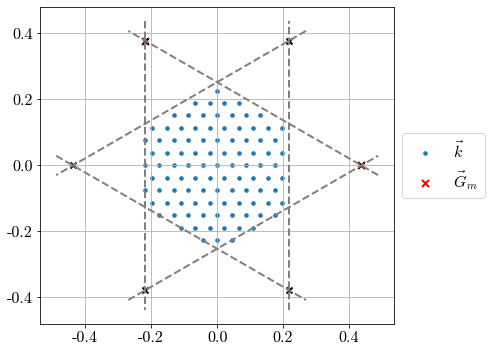

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
end = 10000

ax.scatter(kpts_obj.kpts[:end, 0], kpts_obj.kpts[:end, 1], marker='.', s=50, label=r'$\vec{k}$')
ax.scatter(basis_obj_u.recip_vecs[0], basis_obj_u.recip_vecs[1], marker='x', color='r', 
           s=50, label=r'$\vec{G}_m$')

ax.plot(bz_edge1[:, 0], bz_edge1[:, 1], '--', c='grey')
ax.plot(bz_edge2[:, 0], bz_edge2[:, 1], '--', c='grey')
ax.plot(bz_edge3[:, 0], bz_edge3[:, 1], '--', c='grey')
ax.plot(bz_edge4[:, 0], bz_edge4[:, 1], '--', c='grey')
ax.plot(bz_edge5[:, 0], bz_edge5[:, 1], '--', c='grey')
ax.plot(bz_edge6[:, 0], bz_edge6[:, 1], '--', c='grey')

ax.scatter(basis_obj_u.recip_vecs.T[:, 0], basis_obj_u.recip_vecs.T[:, 1], marker='x', c='k')
ax.scatter(-basis_obj_u.recip_vecs.T[:, 0], -basis_obj_u.recip_vecs.T[:, 1], marker='x', c='k')
ax.scatter(recip_vecs_u2.T[0], recip_vecs_u2.T[1], marker='x', c='k')
ax.scatter(-recip_vecs_u2.T[0], -recip_vecs_u2.T[1], marker='x', c='k')

ax.grid()
ax.legend()
ax.set_aspect('equal')

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Plot bands

/local/ipykernel_263953/2620036417.py:5: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(1, 1, figsize=(8, 6))


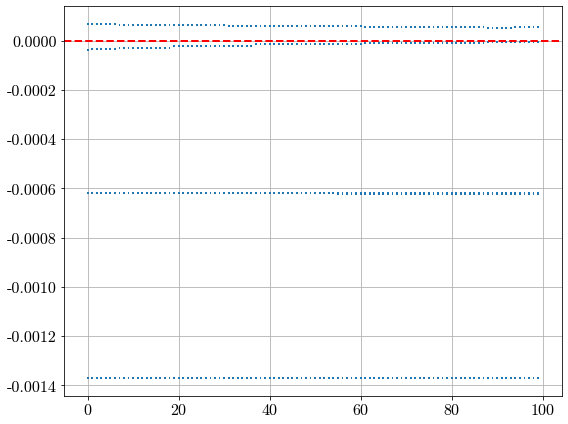

In [8]:
nband = 5
xticks = numpy.array([numpy.ones(_bloch_energy[i].shape) * i for i in range(kpts_obj.nkpt)])
dx = 0.2

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

for i in range(kpts_obj.nkpt):
    x = xticks[i, :nband]
    ax.hlines(_bloch_energy[i, :nband], x-dx, x+dx)

ax.axhline(0., color='r', ls='--')
ax.grid()

In [27]:
%autoreload

def test_get_bloch_coeff_and_rho_grid():
    wannier_obj = wannier.Wannier(bloch_coeff, basis_obj_u, kpts_obj, verbose=verbose)
    
    # Test values.
    ngridx = 120
    ncellx = 1
    
    grid, weight = wannier_obj.get_grid(ngridx=ngridx, ncellx=ncellx)
    L_u = wannier_obj.L_u
    
    bloch_coeff_grid = wannier_obj.get_bloch_coeff_grid(grid=grid, weight=weight)
    bloch_rho_grid = wannier_obj.get_rho_grid(weight, bloch_coeff_grid)
    bloch_rho_grid_tot = numpy.sum(bloch_rho_grid, axis=1)
    
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    im = ax.scatter(grid[:, 0]/L_u, grid[:, 1]/L_u, marker='.', c=bloch_rho_grid_tot)
    ax.grid()
    ax.set_xlabel(r'$x/L_u$')
    ax.set_ylabel(r'$y/L_u$')
    ax.set_aspect('equal')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.1)
    fig.colorbar(im, cax=cax, orientation='vertical')
    
    fig, axs = plt.subplots(3, 4, figsize=(12, 12), sharex=True, sharey=True)
    axs = axs.flatten()
    
    for ax in axs:
        idx = numpy.random.randint(0, bloch_rho_grid.shape[1])
        bloch_rho_grid_idx = bloch_rho_grid[:, idx]
        print(numpy.sum(bloch_rho_grid_idx))
        im = ax.scatter(grid[:, 0]/L_u, grid[:, 1]/L_u, marker='.', c=bloch_rho_grid_idx)
        ax.set_title(f'idx: {idx}')
        ax.set_aspect('equal')
        divider = make_axes_locatable(ax)
        cax = divider.append_axes('right', size='5%', pad=0.1)
        fig.colorbar(im, cax=cax, orientation='vertical')
        
    ax.set_xlabel(r'$x/L_u$')
    ax.set_ylabel(r'$y/L_u$')
    
    print(numpy.sum(bloch_rho_grid_tot))
    
#     numpy.savez('test_get_bloch_coeff_and_rho_grid', grid=grid, weight=weight, bloch_coeff=bloch_coeff,
#                 bloch_coeff_grid=bloch_coeff_grid, bloch_rho_grid=bloch_rho_grid)

/local/ipykernel_263953/64058993.py:17: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(1, 1, figsize=(8, 8))
/local/ipykernel_263953/64058993.py:24: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  cax = divider.append_axes('right', size='5%', pad=0.1)
/local/ipykernel_263953/64058993.py:25: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig.colorbar(im, cax=cax, orientation='vertical')
/local/ipykernel_263953/64058993.py:27: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, axs = plt.subplots(3, 4, figsize=(12, 12), sharex=True, sharey=True)
/local/ipykernel_263953/64058993.py:38: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  cax = divider.append_axes('right', size='5%', pad=0.1)
/

(0.9999999999999999+1.420503553876498e-19j)
(1.0000000000000009-5.36971595424012e-19j)
(0.9999999999999994-2.319708667882511e-19j)
(0.9999999999999998-4.073300277239286e-20j)
(1.0000000000000002-5.119008819883865e-19j)
(0.9999999999999998-3.2640406305142465e-19j)
(0.9999999999999999-4.249474383769484e-19j)
(1.0000000000000004+9.850849230922268e-20j)
(0.9999999999999999-1.7201007765683479e-19j)
(0.9999999999999996+5.346890752843598e-19j)
(0.9999999999999999-9.557959419455855e-19j)
(0.9999999999999997+5.408187686649092e-19j)
(100-5.388608439198272e-18j)


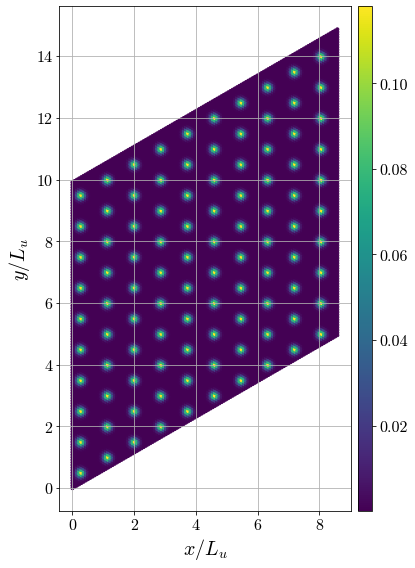

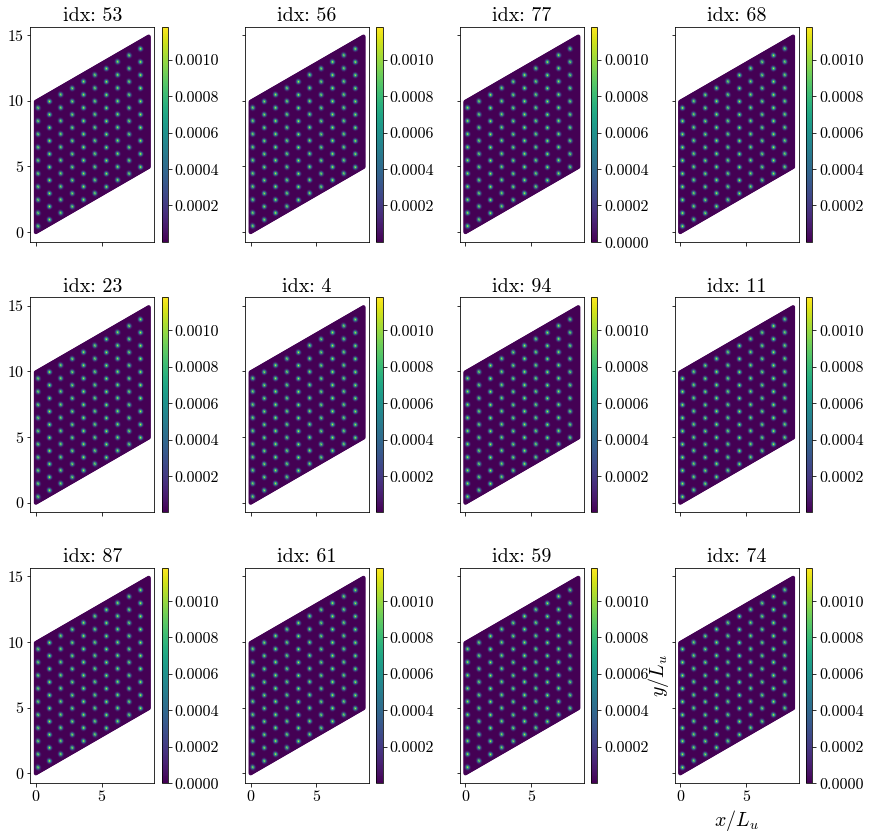

In [28]:
test_get_bloch_coeff_and_rho_grid()

In [25]:
%autoreload

def test_get_R_shift():
    wannier_obj = wannier.Wannier(bloch_coeff, basis_obj_u, kpts_obj, verbose=verbose)
    
    # Test values.
    ngridx = 120
    ncellx = 1
    
    grid, weight = wannier_obj.get_grid(ngridx=ngridx, ncellx=ncellx)
    L_u = wannier_obj.L_u
    
    bloch_coeff_grid = wannier_obj.get_bloch_coeff_grid(grid=grid, weight=weight)
    bloch_rho_grid = wannier_obj.get_rho_grid(weight, bloch_coeff_grid)
    bloch_rho_grid_tot = numpy.sum(bloch_rho_grid, axis=1)
    R_shift = wannier_obj.get_R_shift(grid, weight, bloch_coeff_grid)
    R_guess = numpy.sum(wannier_obj.direct_vecs_u, axis=1)/3.
    print(R_shift/L_u)
    print(R_guess/L_u)
    
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    im = ax.scatter(grid[:, 0]/L_u, grid[:, 1]/L_u, marker='.', c=bloch_rho_grid_tot)
    ax.scatter(R_shift[0]/L_u, R_shift[1]/L_u, marker='x', s=50, color='r', label=r'$\vec{R}$ shift')
    ax.scatter(R_guess[0]/L_u, R_guess[1]/L_u, marker='.', s=50, color='cyan', label=r'$\vec{R}$ guess')
    ax.grid()
    ax.legend()
    ax.set_xlabel(r'$x/L_u$')
    ax.set_ylabel(r'$y/L_u$')
    ax.set_aspect('equal')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.1)
    fig.colorbar(im, cax=cax, orientation='vertical')
    
#     numpy.savez('test_get_R_shift', grid=grid, weight=weight, bloch_coeff=bloch_coeff,
#                 bloch_coeff_grid=bloch_coeff_grid, R_shift=R_shift)

[0.28867513 0.5       ]
[0.28867513 0.5       ]


/local/ipykernel_263953/1321679568.py:21: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(1, 1, figsize=(8, 8))
/local/ipykernel_263953/1321679568.py:31: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  cax = divider.append_axes('right', size='5%', pad=0.1)
/local/ipykernel_263953/1321679568.py:32: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig.colorbar(im, cax=cax, orientation='vertical')


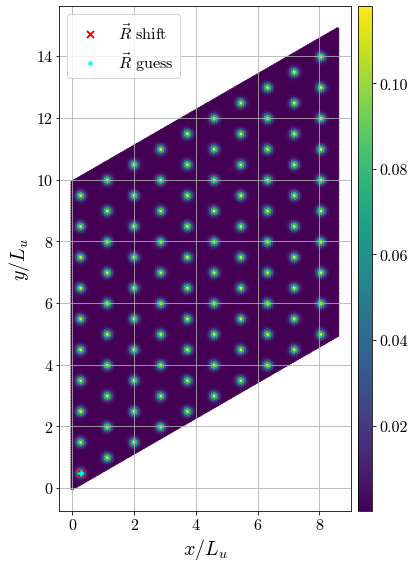

In [26]:
test_get_R_shift()

In [11]:
%autoreload

def test_get_shifted_lattice_sites_w_R_shift():
    wannier_obj = wannier.Wannier(bloch_coeff, basis_obj_u, kpts_obj, verbose=verbose)
    
    # Test values.
    ngridx = 120
    ncellx = 1

    grid, weight = wannier_obj.get_grid(ngridx=ngridx, ncellx=ncellx)
    L_u = wannier_obj.L_u
    
    bloch_coeff_grid = wannier_obj.get_bloch_coeff_grid(grid=grid, weight=weight)
    bloch_rho_grid = wannier_obj.get_rho_grid(weight, bloch_coeff_grid)
    bloch_rho_grid_tot = numpy.sum(bloch_rho_grid, axis=1)
    sites = wannier_obj.get_shifted_lattice_sites_w_R_shift(grid, weight, bloch_coeff_grid)
    
    ref_R_shift = numpy.sum(wannier_obj.direct_vecs_u, axis=1)/3.
    numpy.testing.assert_allclose(wannier_obj.R_shift, ref_R_shift)
    
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    im = ax.scatter(grid[:, 0]/L_u, grid[:, 1]/L_u, marker='.', c=bloch_rho_grid_tot)
    ax.scatter(sites[:, 0]/L_u, sites[:, 1]/L_u, marker='x', s=50, color='r', label=r'sites')
    ax.grid()
    ax.legend()
    ax.set_xlabel(r'$x/L_u$')
    ax.set_ylabel(r'$y/L_u$')
    ax.set_aspect('equal')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.1)
    fig.colorbar(im, cax=cax, orientation='vertical')
    
    numpy.savez('test_get_shifted_lattice_sites_w_R_shift', grid=grid, weight=weight, 
                bloch_coeff=bloch_coeff, bloch_coeff_grid=bloch_coeff_grid, sites=sites)


# Obtaining lattice sites with R_shift: 
[4.79053346 8.29744735]



/local/ipykernel_524703/1677922155.py:21: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(1, 1, figsize=(8, 8))
/burg/opt/anaconda3-2022.05/lib/python3.9/site-packages/matplotlib/axes/_axes.py:4193: ComplexWarning: Casting complex values to real discards the imaginary part
  c = np.asanyarray(c, dtype=float)
/local/ipykernel_524703/1677922155.py:30: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  cax = divider.append_axes('right', size='5%', pad=0.1)
/local/ipykernel_524703/1677922155.py:31: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig.colorbar(im, cax=cax, orientation='vertical')


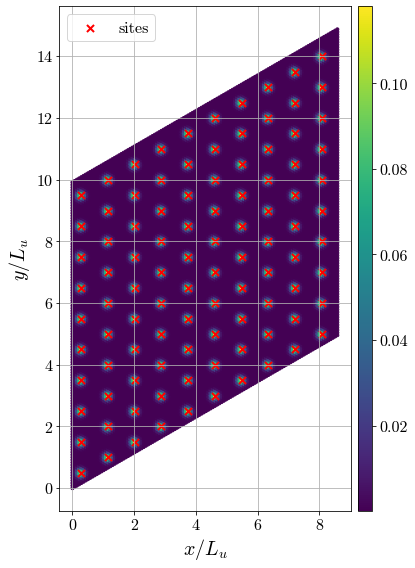

In [12]:
test_get_shifted_lattice_sites_w_R_shift()

In [21]:
%autoreload

def test_get_shifted_lattice_sites():
    wannier_obj = wannier.Wannier(bloch_coeff, basis_obj_u, kpts_obj, verbose=verbose)
    R_shift = numpy.sum(wannier_obj.direct_vecs_u, axis=1)/3.
    sites = wannier_obj.get_shifted_lattice_sites(R_shift)
    
    # Test against sites obtained with `test_get_shifted_lattice_sites_w_R_shift`.
    ref_wannier_obj = wannier.Wannier(bloch_coeff, basis_obj_u, kpts_obj, verbose=verbose)
    
    # Test values.
    ngridx = 120
    ncellx = 1
    grid, weight = ref_wannier_obj.get_grid(ngridx=ngridx, ncellx=ncellx)
    L_u = ref_wannier_obj.L_u
    
    ref_bloch_coeff_grid = ref_wannier_obj.get_bloch_coeff_grid(grid=grid, weight=weight)
    ref_bloch_rho_grid = ref_wannier_obj.get_rho_grid(weight, ref_bloch_coeff_grid)
    ref_bloch_rho_grid_tot = numpy.sum(ref_bloch_rho_grid, axis=1)
    ref_sites = ref_wannier_obj.get_shifted_lattice_sites_w_R_shift(grid, weight, ref_bloch_coeff_grid)
    
    numpy.testing.assert_allclose(wannier_obj.R_shift, ref_wannier_obj.R_shift)
    numpy.testing.assert_allclose(sites, ref_sites)
    
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    im = ax.scatter(grid[:, 0]/L_u, grid[:, 1]/L_u, marker='.', c=ref_bloch_rho_grid_tot)
    ax.scatter(sites[:, 0]/L_u, sites[:, 1]/L_u, marker='x', s=50, color='r', label=r'sites')
    ax.scatter(ref_sites[:, 0]/L_u, ref_sites[:, 1]/L_u, marker='.', s=50, color='g', label=r'ref_sites')
    ax.grid()
    ax.legend()
    ax.set_xlabel(r'$x/L_u$')
    ax.set_ylabel(r'$y/L_u$')
    ax.set_aspect('equal')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.1)
    fig.colorbar(im, cax=cax, orientation='vertical')
    
#     numpy.savez('test_get_shifted_lattice_sites', grid=grid, weight=weight, bloch_coeff=bloch_coeff,
#                 bloch_coeff_grid=bloch_coeff_grid, sites=sites)


# Obtaining lattice sites with R_shift: 
[4.79053346 8.29744735]


# Obtaining lattice sites with R_shift: 
[4.79053346 8.29744735]



/local/ipykernel_524703/2120871826.py:25: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(1, 1, figsize=(8, 8))
/local/ipykernel_524703/2120871826.py:35: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  cax = divider.append_axes('right', size='5%', pad=0.1)
/local/ipykernel_524703/2120871826.py:36: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig.colorbar(im, cax=cax, orientation='vertical')


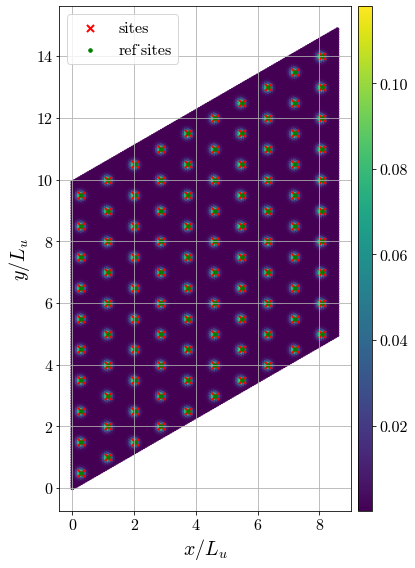

In [22]:
test_get_shifted_lattice_sites()

In [42]:
%autoreload

def test_get_centered_grid():
    wannier_obj = wannier.Wannier(bloch_coeff, basis_obj_u, kpts_obj, verbose=verbose)
    
    # Test values.
    ngridx = 120
    ncellx = 1
    
    grid, weight = wannier_obj.get_grid(ngridx=ngridx, ncellx=ncellx)
    L_u = wannier_obj.L_u
    
    bloch_coeff_grid = wannier_obj.get_bloch_coeff_grid(grid=grid, weight=weight)
    sites = wannier_obj.get_shifted_lattice_sites(grid, weight, bloch_coeff_grid)
    centered_grid = wannier_obj.get_centered_grid(sites, grid)
    
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    ax.scatter(centered_grid[:, 0]/L_u, centered_grid[:, 1]/L_u, 
               marker='.', color='grey', label='grid', alpha=0.6)
    ax.scatter(sites[:, 0]/L_u, sites[:, 1]/L_u, marker='x', s=50, color='k', label='sites')
    ax.scatter(wannier_obj.direct_vecs_u[0]/L_u, 
               wannier_obj.direct_vecs_u[1]/L_u, marker='v', s=50, color='cyan', label='direct vecs')
    
    for i, site in enumerate(sites):
        ax.text(site[0]/L_u, site[1]/L_u, f'{i}', 
                fontsize=18, color='r', weight='bold')
        
    ax.grid()
    ax.legend()
    ax.set_xlabel(r'$x/L_u$')
    ax.set_ylabel(r'$y/L_u$')
    ax.set_aspect('equal')
    
#     numpy.savez('test_get_centered_grid', grid=grid, weight=weight, bloch_coeff=bloch_coeff,
#                 bloch_coeff_grid=bloch_coeff_grid, centered_grid=centered_grid, sites=sites)


# Obtaining lattice sites with R_shift: 
[4.79053346 8.29744735]


# sites_center = [ 69.4627352  120.31298659]
# grid_center = [ 71.25918525 123.42452935]
# shift = [-1.79645005 -3.11154276]


/local/ipykernel_263953/1568121127.py:17: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(1, 1, figsize=(8, 8))


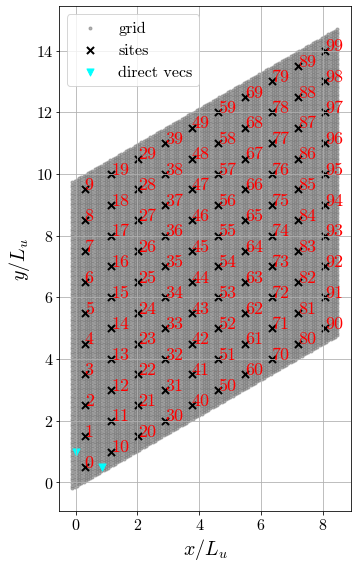

In [43]:
test_get_centered_grid()

In [33]:
%autoreload

def test_fix_gauge_proj():
    wannier_obj = wannier.Wannier(bloch_coeff, basis_obj_u, kpts_obj, verbose=verbose)
    
    # Test values.
    ngridx = 120
    ncellx = 1
    
    grid, weight = wannier_obj.get_grid(ngridx=ngridx, ncellx=ncellx)
    L_u = wannier_obj.L_u
    
    bloch_coeff_grid = wannier_obj.get_bloch_coeff_grid(grid=grid, weight=weight)
    R_shift = wannier_obj.get_R_shift(grid, weight, bloch_coeff_grid)
    wannier_obj.fix_gauge(method='proj', R=R_shift, C=0.01)
    
#     numpy.savez('test_fix_gauge_proj', grid=grid, weight=weight, bloch_coeff=bloch_coeff,
#                 bloch_coeff_grid=bloch_coeff_grid, bloch_coeff_fg=wannier_obj.mo_coeff, R_shift=R_shift)

In [34]:
test_fix_gauge_proj()


# Fixing gauge by projecting Gaussian onto Bloch orbitals...
0: (0.9999999999999986-5.1086721620822515e-21j)
1: (0.9999999999997842-6.569916576681196e-07j)
2: (0.9999999999997843+6.569916576868492e-07j)
3: (0.9999999999997848+6.56991657684735e-07j)
4: (0.9999999999997844-6.569916576706201e-07j)
5: (0.9999999999997844+6.569916576725174e-07j)
6: (0.9999999999997842-6.569916576754854e-07j)
7: (1-1.9551867580736833e-19j)
8: (1+1.5498216906208483e-17j)
9: (1.0000000000000004+2.753019248421487e-18j)
10: (1-2.4611946775137835e-18j)
11: (0.9999999999999999+8.2417004951869e-18j)
12: (1.0000000000000002-8.548527247534803e-18j)
13: (0.9999999999862299-5.248025654665744e-06j)
14: (0.9999999999862301+5.248025654682007e-06j)
15: (0.9999999999862297+5.248025654688837e-06j)
16: (0.9999999999862301-5.248025654671165e-06j)
17: (0.9999999999862298+5.248025654702661e-06j)
18: (0.9999999999862299-5.24802565466878e-06j)
19: (0.9999999999785487-6.550029072039667e-06j)
20: (0.9999999999785487+6.5500290719987

In [4]:
%autoreload

def test_get_wannier_coeff_grid():
    wannier_obj = wannier.Wannier(bloch_coeff, basis_obj_u, kpts_obj, verbose=verbose)
    
    # Test values.
    ngridx = 180
    ncellx = 1
    
    grid, weight = wannier_obj.get_grid(ngridx=ngridx, ncellx=ncellx)
    L_u = wannier_obj.L_u
    
    bloch_coeff_grid = wannier_obj.get_bloch_coeff_grid(grid=grid, weight=weight)
    sites = wannier_obj.get_shifted_lattice_sites(grid, weight, bloch_coeff_grid)
    centered_grid = wannier_obj.get_centered_grid(sites, grid)
    wannier_obj.fix_gauge(method='proj', R=wannier_obj.R_shift, C=0.01)
    
    wannier_coeff_grid = wannier_obj.get_wannier_coeff_grid(centered_grid, weight, sites)
    wannier_rho_grid = wannier_obj.get_rho_grid(weight, wannier_coeff_grid)
    wannier_rho_grid_tot = numpy.sum(wannier_rho_grid, axis=1)
    print(wannier_coeff_grid.shape)
    
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    im = ax.scatter(centered_grid[:, 0]/L_u, centered_grid[:, 1]/L_u, marker='.', c=wannier_rho_grid_tot)
    ax.grid()
    ax.set_xlabel(r'$x/L_u$')
    ax.set_ylabel(r'$y/L_u$')
    ax.set_aspect('equal')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.1)
    fig.colorbar(im, cax=cax, orientation='vertical')
    
    fig, axs = plt.subplots(3, 4, figsize=(12, 12), sharex=True, sharey=True)
    axs = axs.flatten()
    
    for ax in axs:
        idx = numpy.random.randint(0, wannier_rho_grid.shape[1])
        wannier_rho_grid_idx = wannier_rho_grid[:, idx]
        print(numpy.sum(wannier_rho_grid_idx))
        im = ax.scatter(centered_grid[:, 0]/L_u, centered_grid[:, 1]/L_u, marker='.', c=wannier_rho_grid_idx)
        ax.set_title(f'idx: {idx}')
        ax.set_aspect('equal')
        divider = make_axes_locatable(ax)
        cax = divider.append_axes('right', size='5%', pad=0.1)
        fig.colorbar(im, cax=cax, orientation='vertical')
        
    ax.set_xlabel(r'$x/L_u$')
    ax.set_ylabel(r'$y/L_u$')
    
    print(numpy.sum(wannier_rho_grid_tot))
    
#     numpy.savez('test_get_wannier_coeff_grid', grid=grid, weight=weight, bloch_coeff=bloch_coeff,
#                 bloch_coeff_grid=bloch_coeff_grid, sites=sites, centered_grid=centered_grid, 
#                 R_shift=wannier_obj.R_shift, wannier_coeff_grid=wannier_coeff_grid, 
#                 wannier_rho_grid=wannier_rho_grid)


# Obtaining lattice sites with R_shift: 
[4.79053346 8.29744735]


# sites_center = [ 69.4627352  120.31298659]
# grid_center = [ 71.45879081 123.77025632]
# shift = [-1.99605561 -3.45726973]

# Fixing gauge by projecting Gaussian onto Bloch orbitals...
0: (0.9999999999999986-5.1086721620822515e-21j)
1: (0.9999999999997842-6.569916576681196e-07j)
2: (0.9999999999997843+6.569916576868492e-07j)
3: (0.9999999999997848+6.56991657684735e-07j)
4: (0.9999999999997844-6.569916576706201e-07j)
5: (0.9999999999997844+6.569916576725174e-07j)
6: (0.9999999999997842-6.569916576754854e-07j)
7: (1-1.9551867580736833e-19j)
8: (1+1.5498216906208483e-17j)
9: (1.0000000000000004+2.753019248421487e-18j)
10: (1-2.4611946775137835e-18j)
11: (0.9999999999999999+8.2417004951869e-18j)
12: (1.0000000000000002-8.548527247534803e-18j)
13: (0.9999999999862299-5.248025654665744e-06j)
14: (0.9999999999862301+5.248025654682007e-06j)
15: (0.9999999999862297+5.248025654688837e-06j)
16: (0.9999999999862301-5.24802565467

/local/ipykernel_524703/4272278060.py:23: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(1, 1, figsize=(8, 8))
/local/ipykernel_524703/4272278060.py:30: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  cax = divider.append_axes('right', size='5%', pad=0.1)
/local/ipykernel_524703/4272278060.py:31: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig.colorbar(im, cax=cax, orientation='vertical')
/local/ipykernel_524703/4272278060.py:33: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, axs = plt.subplots(3, 4, figsize=(12, 12), sharex=True, sharey=True)
/local/ipykernel_524703/4272278060.py:44: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  cax = divider.append_axes('right', size='5%', 

(1+3.587030536547688e-22j)
(0.9999999999999999-1.8724897685619952e-22j)
(0.9999999999999999+3.6501621999625775e-22j)
(1.0000000000000002-5.876884128297543e-22j)
(1-1.1505340512895794e-22j)
(0.9999999999999996+3.5163790484473396e-22j)
(1-3.1177339196292506e-22j)
(1+8.425401360313712e-24j)
(100-1.096118848463075e-21j)
CPU times: user 3min 21s, sys: 3min 16s, total: 6min 37s
Wall time: 22.5 s


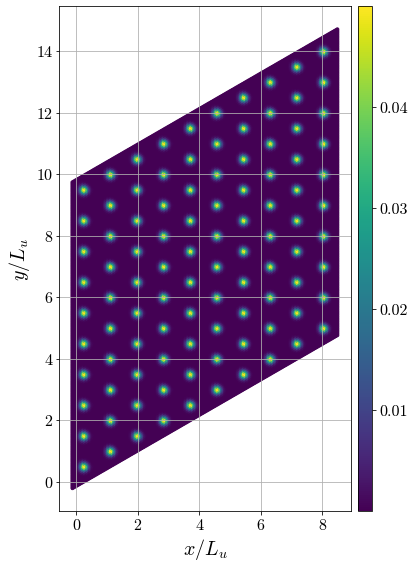

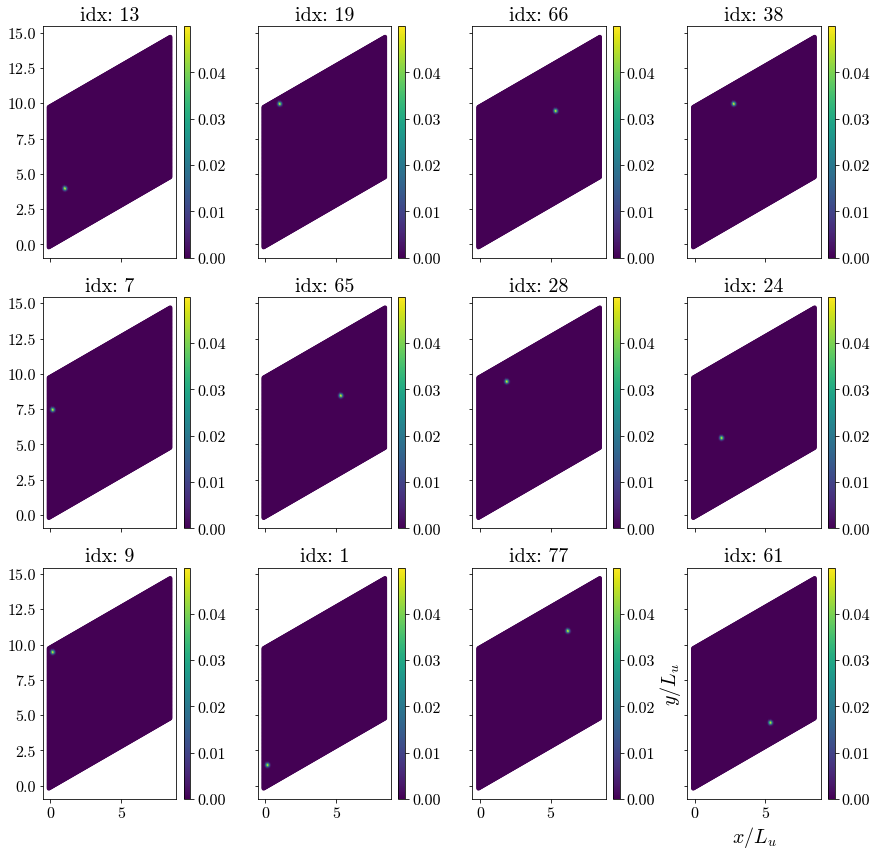

In [6]:
%%time

test_get_wannier_coeff_grid()